In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame, YouTubeVideo
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,sqrt,array,linspace,arange,meshgrid
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from ipywidgets import interact

plt.rcParams["figure.figsize"] = [7,7]

from numpy.linalg import norm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$

### Example

Find the minimum surface area of a lidless shoebox with volume $32 \text{ L}$.

[See demo here.](https://drew.youngren.nyc/mvc-f20/lagrange-box.html)

In [3]:
@interact
def _(lev=(3000,5600,200),angle=(-108,90,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(vangle,angle)
    x = y = linspace(20,50,100)
    x,y = meshgrid(x,y)
    ax.plot_surface(x,y,32000/(x*y))
    ax.plot_surface(x,y,(lev - x*y)/(2*x + 2*y),alpha=.5)
    ax.set_zlim(0,80)

interactive(children=(IntSlider(value=4200, description='lev', max=5600, min=3000, step=200), IntSlider(value=…

### Solution 

The variables are the length, width, and height of the box. We use $x$, $y$, and $z$, all positive. The target function is surface area $$S(x,y,z) = xy + 2yz + 2xz.$$ The constraint is the fixed volume $$V(x,y,z) = xyz = 32000 \text{ cm}^3.$$

We set up Lagrange's equations

$$\nabla S = \bv{y + 2z \\ x + 2z \\ 2x + 2y} = \lambda \bv{yz \\ xz \\ xy}$$

We can exploit symmetry here and multiply the equations by $x$, $y$, and $z$, respectively, so the right hand side is $\lambda xyz = \lambda 32000$ for each. Thus, we have $$xy + 2xz = xy + 2yz = 2xz + 2yz$$ which quickly reduces to $x = y = 2z$. Finally, plugging back into the constraint, we have $$(2z)(2z)z = 4z^3 = 32000$$ so $z = 20$ and $x = y =40$. Thus the minimum surface area is $$S(40,40,20) = 4800\text{ cm}^2.$$

###
<p style="padding-bottom:40%;"> </p>

### Example 

Suppose the temperature distribution on the closed half-disk $0 \leq y \leq \sqrt{16-x^2}$ is given by

$$u(x,y) = x^2 - 6x + 4y^2 - 8y. $$

Find the hottest and coldest points.  

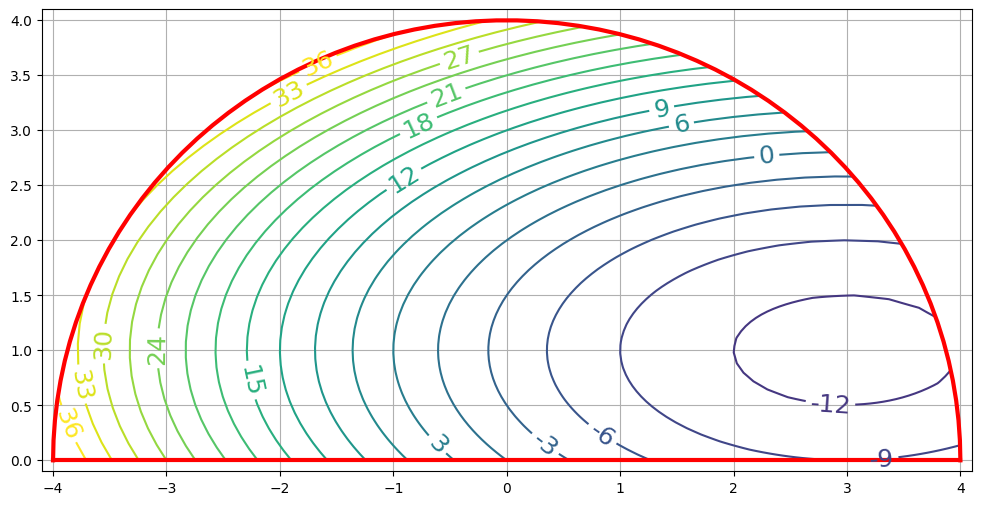

In [6]:
def u(x,y):
    return x**2 - 6*x + (4*y**2 - 8*y)
plt.figure(figsize=np.array((10,5))*1.2)
r = np.linspace(0,4,70)
th = np.linspace(0,np.pi,70)
R,T = np.meshgrid(r,th)
plt.grid(True)
cp = plt.contour(R*cos(T),R*sin(T),u(R*cos(T),R*sin(T)) ,levels=np.arange(-21,39,3))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(4*cos(th),4*sin(th),'-r',lw=3)
plt.plot(4*cos(th),np.zeros_like(th),'-r',lw=3)
plt.xlim((-4.10,4.1));
plt.ylim((-.10,4.1));

### Solution

On the interior, we look for critical points. 
$$ \nabla u = \bv{2x - 6 \\ 8y - 8} = \bv{0 \\ 0} $$
which has a single point at $(3, 1)$. 

In [19]:
cpts = [(3,1)]

Now we turn to the boundary and use Lagrange multipliers. It possible, but tricky to find one function to define the entire boundary at once. Instead, we look first at the bottom edge. $$g(x,y) = y = 0 \qquad \nabla g(x,y) = \langle 0, 1)$$ The Lagrange equation $\nabla f = \lambda \nabla g$ give us $(3,0)$.

In [20]:
cpts.append((3,0))

The top half is defined by $g(x,y) = x^2 + y^2 = 16$ so the Lagrange equations become 
$$ \nabla u = \bv{2x - 6 \\ 8y - 8} = \lambda \bv{2x \\ 2y} = \lambda\nabla g $$ 

In [22]:
from scipy.optimize import root

In [26]:
def func(v):
    x, y, lam = v
    return np.array((x**2 + y**2 - 16, (1 - lam)*x -3, (4 - lam)*y - 4))

sol1 = root(func, np.array((4, 1, 1))).x
cpts.append(tuple(sol1[:2]))

In [28]:
sol1 = root(func, np.array((-2, 3.5, 1))).x
cpts.append(tuple(sol1[:2]))
cpts

[(3, 1),
 (3, 0),
 (3.857314122147151, 1.058833208272959),
 (-1.5682403059574161, 3.6797584625579565)]

In [29]:
sol1 = root(func, np.array((-4, 1, 1))).x
cpts.append(tuple(sol1[:2]))
cpts

[(3, 1),
 (3, 0),
 (3.857314122147151, 1.058833208272959),
 (-1.5682403059574161, 3.6797584625579565),
 (-3.54241341375075, 1.8577694168236651)]

Finally, we need to throw in the corners. 

In [30]:
cpts.append((-4, 0))
cpts.append((4, 0))

In [31]:
def f(x,y):
    return x**2 - 6*x + 4*y**2 - 8*y

In [33]:
for p in cpts:
    print(f"At {p}, the value is {f(*p)}.")

At (3, 1), the value is -13.
At (3, 0), the value is -9.
At (3.857314122147151, 1.058833208272959), the value is -12.251167110384301.
At (-1.5682403059574161, 3.6797584625579565), the value is 36.593241163577844.
At (-3.54241341375075, 1.8577694168236651), the value is 32.74624676617778.
At (-4, 0), the value is 40.
At (4, 0), the value is -8.


So the hottest point is at $(-4, 0)$ and the coldest point is at $(3,1)$.

### <p style="padding-bottom:40%;"> </p>

### Exercise

By investing $x$ units of labor and $y$ units of capital, a low-end watch manufacturer can produce $x^{0.4}y^{0.6}$ watches. Find the maximum number of watches that can be produced with a budget of $\$20000$ if labor costs $\$100$ per unit and capital costs $\$200$ per unit.

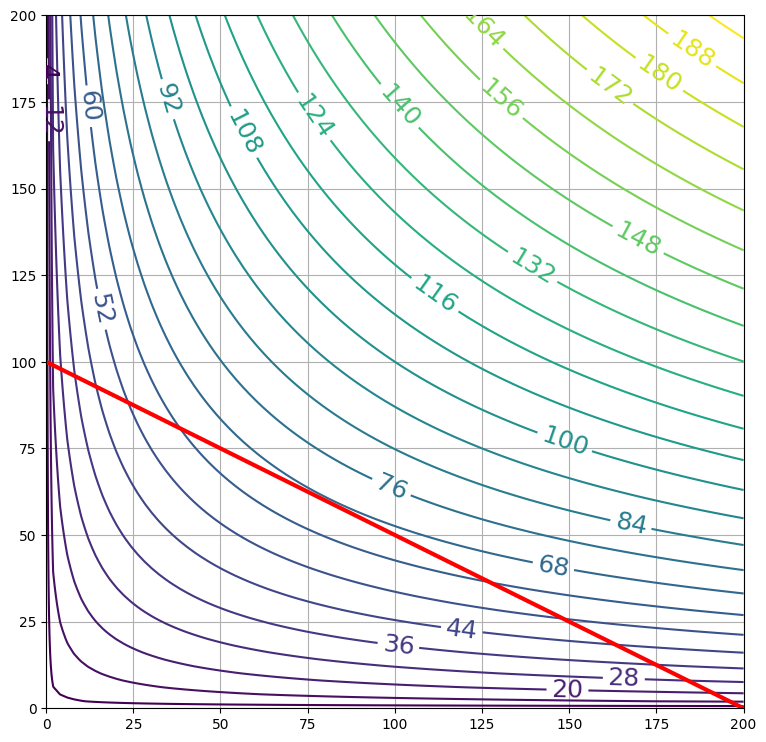

In [7]:
x = y = np.linspace(0,200,100)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(9,9))

plt.grid(True)
cp = plt.contour(X,Y,X**.4*Y**.6,levels=np.arange(4,200,8))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x,100 - x/2,'-r',lw=3);
# plt.ylim((-2,2));

### Solution

The variables are given and clearly we want to maximize watches $$w(x,y) = x^{2/5}y^{3/5}$$ the well-known Cobb-Douglas model. The constraint is the budget $$b(x,y) = 100x + 200y = 20000$$ which is a linear function. 

We compute $$\nabla w = \bv{\frac25(y/x)^{3/5} \\ \frac35(x/y)^{2/5}} = \lambda \bv{100 \\ 200}$$ which looks bad until you realize you divide both sides of the two equations and everything collapses quite nicely. 

$$ \frac{(y/x)^{3/5}}{(x/y)^{2/5}} = \frac{2y}{3x} = \frac12 $$ so $y = \frac34w$. Plug into constraint to get $250x = 20000$, so the maximum no. of watches is $$w(80,60) \approx 67.$$

In [8]:
80**.4*60**.6

67.31730872677197

### <div style="padding-bottom: 40%"></div>

### Exercise

An "ice cream cone" is formed with a semicircle on top of an isosceles triangle as shown. Find the dimensions that maximize area for a fixed perimeter $P$.

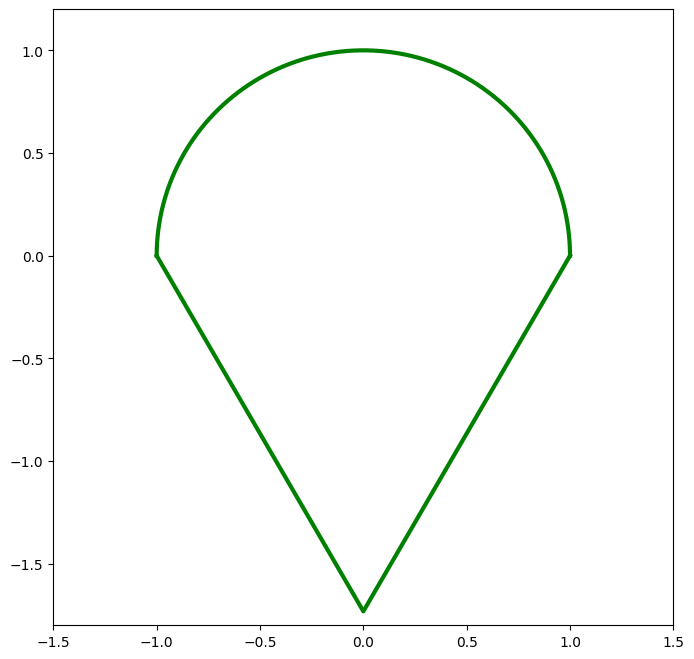

In [9]:
plt.figure(figsize=(8,8))
t = linspace(0,1,100)
plt.plot(cos(t*pi), sin(t*pi),'g',lw=3)
plt.plot([-1,0,1],[0,-sqrt(3),0],'g',lw=3)
plt.ylim(-1.8,1.2)
plt.xlim(-3/2,3/2);


### Solution 

Here are several possibilities with a fixed perimeter.

(-3.0, 3.0)

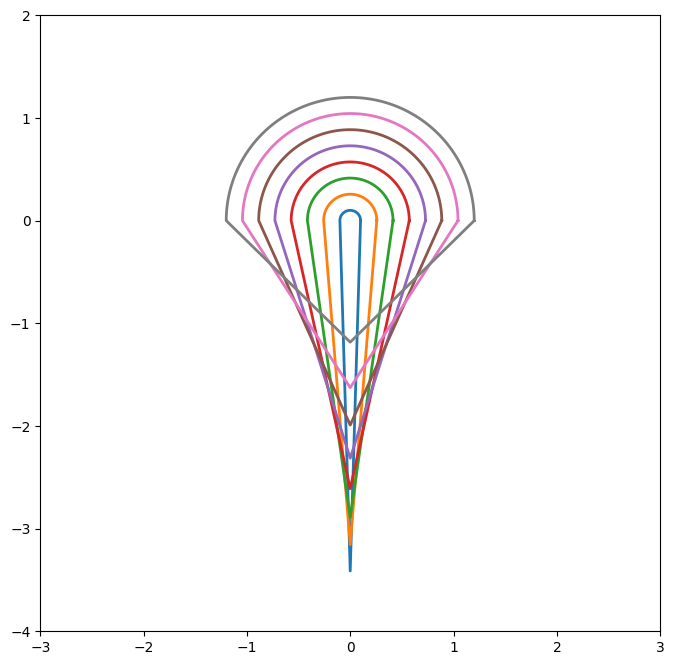

In [10]:
P = pi + 4
plt.figure(figsize=(8,8))
for r in linspace(.1,1.2,8):
    plt.plot(np.concatenate([r*cos(t*pi), [0,r]]), np.concatenate([r*sin(t*pi),[-sqrt((P - r*pi)**2/4 - r**2), 0]]),lw=2)

plt.ylim(-4,2)
plt.xlim(-3,3)

We maximize area $$A(r,h) = \frac12 \pi r^2 + rh$$ as a function of the radius $r$ and height of triangle $h$. The constraint is perimeter $$g(r,h) = \pi r + 2\sqrt{r^2 + h^2} = P.$$

So we solve $$\nabla A = \bv{\pi r + h \\ r} = \lambda \bv{ \pi + \frac{2r}{\sqrt{r^2 + h^2}} \\ \frac{2h}{\sqrt{r^2 + h^2}}} = \lambda \nabla g $$

In [13]:
from scipy.optimize import root

In [14]:
def Cone(v):
    r,h,lam = v
    return [ pi*r + h - lam*(pi + 2*r/sqrt(r**2 + h**2)), r - lam*(2*h/sqrt(r**2 + h**2)), pi*r + 2*sqrt(r**2 + h**2) - (pi + 4) ]

In [15]:
r0, h0, lam = root(Cone,[2,1,1]).x

HTML(f"The optimal solution is $(r,h) = ({r0},{h0})$")

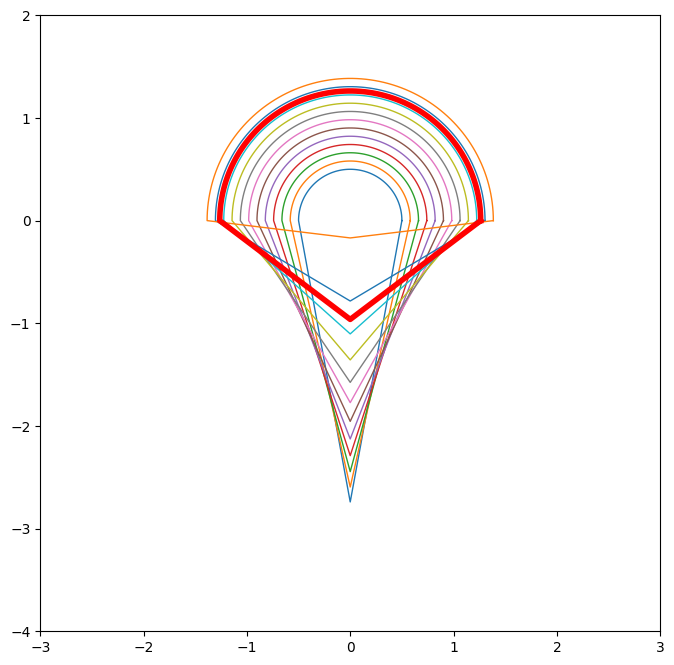

In [16]:
P = pi + 4
plt.figure(figsize=(8,8))
for r in linspace(.5,1.385,12):
    plt.plot(np.concatenate([r*cos(t*pi), [0,r]]), np.concatenate([r*sin(t*pi),[-sqrt((P - r*pi)**2/4 - r**2), 0]]),lw=1)

plt.plot(np.concatenate([r0*cos(t*pi), [0,r0]]), np.concatenate([r0*sin(t*pi),[-sqrt((P - r0*pi)**2/4 - r0**2), 0]]),'r',lw=4)

    
plt.ylim(-4,2)
plt.xlim(-3,3);

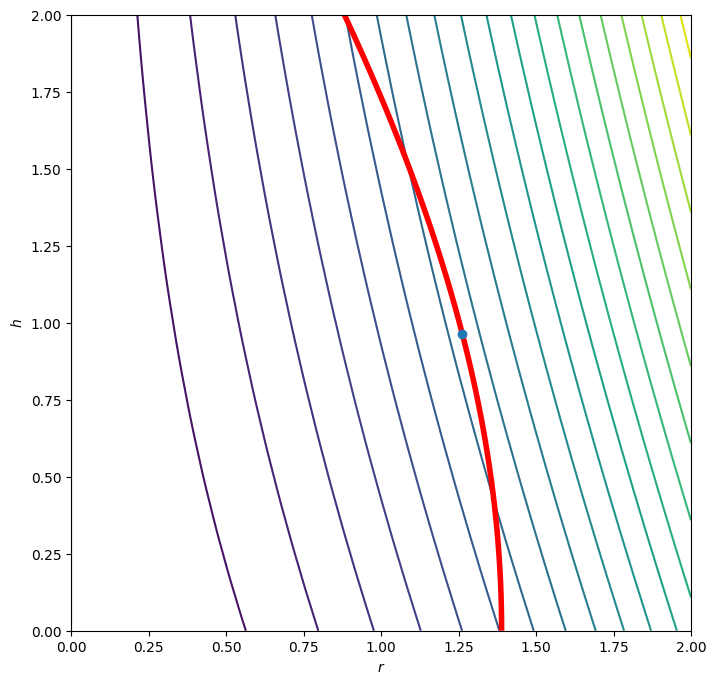

In [17]:
x = y = linspace(0,2)
plt.figure(figsize=(8,8))
x,y = meshgrid(x,y)
plt.contour(x,y,1/2*pi*x**2 + x*y,levels=20)
plt.contour(x,y,pi*x + 2*sqrt(x**2 + y**2),levels=[P],colors=['r'],linewidths=[4])
plt.xlabel("$r$")
plt.ylabel("$h$")
plt.scatter([r0],[h0],zorder=2);